# Pstock example notebook

## Assets

Assets are any type of stock, currency, future, ... availlable in yahoo-finance.

An Asset is identified by it's ticker symbol for example: 'TSLA', 'BTC-USD', '^QQQ', ...

In [1]:
from pstock import Asset

aapl = await Asset.get("aapl") # or AAPL
aapl

Asset(symbol='AAPL')

Each `Asset` is an instance of a pydantic BaseModel that contain general info about a symbol: name, currency, industry, sector, ...

The `Asset` object can be subclassed to extract more information as needed from yahoo-finance

In [2]:
print(f"symbol: {aapl.symbol}")
print(f"name: {aapl.name}")
print(f"asset_type: {aapl.asset_type}")
print(f"currency: {aapl.currency}")
print(f"latest_price: {aapl.latest_price}")
print(f"industry: {aapl.industry}")
print(f"sector: {aapl.sector}")

symbol: AAPL
name: Apple Inc.
asset_type: EQUITY
currency: USD
latest_price: 168.735
industry: Consumer Electronics
sector: Technology


When availlable we also provide earnings, trends and income statement of an `Asset` 

(Availlable for EQUITY type assets)

The `earnings`/`trends`/`income_statement` objects are also pydantic `BaseModel` with an additional `.df` property to convert them to a pandas DataFrame

In [3]:
aapl.earnings.df

,estimate,actual,status,revenue,earnings
quarter,,,,,
1Q2021,0.99,1.40,Beat,8.958400e+10,2.363000e+10
2Q2021,1.01,1.30,Beat,8.143400e+10,2.174400e+10
3Q2021,1.24,1.24,Beat,8.336000e+10,2.055100e+10
4Q2021,1.89,2.10,Beat,1.239450e+11,3.463000e+10
1Q2022,1.43,NaN,None,NaN,NaN


In [4]:
aapl.trends.df

,strong_buy,buy,hold,sell,strong_sell,score,recomendation
date,,,,,,,
2021-11-16,13,20,8,0,0,1.88,BUY
2021-12-16,13,21,7,0,0,1.85,BUY
2022-01-15,14,22,6,0,0,1.81,BUY
2022-02-14,11,21,6,0,0,1.87,BUY


In [5]:
aapl.income_statement.df

,date,ebit,total_revenue,gross_profit
0,2021-09-25,1.089490e+11,3.658170e+11,1.528360e+11
1,2020-09-26,6.628800e+10,2.745150e+11,1.049560e+11
2,2019-09-28,6.393000e+10,2.601740e+11,9.839200e+10
3,2018-09-29,7.089800e+10,2.655950e+11,1.018390e+11


We can also get info of multiple assets simultaneously, by using the `Assets` object, and providing a list of symbols.

The `Assets` can also be viewed as a DataFrame.

In [6]:
from pstock import Assets

assets = await Assets.get(["aapl", "TSLA", "BTC-USD", "^QQQ"])
assets.df

,name,asset_type,currency,latest_price,sector,industry,earnings,trends,income_statement
symbol,,,,,,,,,
AAPL,Apple Inc.,EQUITY,USD,168.735,Technology,Consumer Electronics,"[{'quarter': '1Q2021', 'estimate': 0.99, 'actu...","[{'date': 2021-11-16, 'strong_buy': 13, 'buy':...","[{'date': 2021-09-25, 'ebit': 108949000000.0, ..."
BTC-USD,Bitcoin USD,CRYPTOCURRENCY,USD,42237.086,None,None,None,None,None
TSLA,"Tesla, Inc.",EQUITY,USD,877.250,Consumer Cyclical,Auto Manufacturers,"[{'quarter': '1Q2021', 'estimate': 0.79, 'actu...","[{'date': 2021-11-16, 'strong_buy': 4, 'buy': ...","[{'date': 2021-12-31, 'ebit': 6523000000.0, 't..."
^QQQ,INVESCO QQQ TRUST,ETF,USD,347.680,None,None,None,None,None


### We can iterate throught the `Assets` like any sequence, and we can access it's values by index. 

In [7]:
for asset in assets:
    print(asset)

symbol='AAPL'
symbol='TSLA'
symbol='BTC-USD'
symbol='^QQQ'


In [8]:
assets[0]

Asset(symbol='AAPL')

## Bars (historical price data)

We can get historical price data using the `Bars` object, we can configure teh bars we want to get the pair `period`/`interval` or alternatively `start`+`end`/`interval`.

by default if no argument is provided `period` is set tp `max` and `interval` is set to max possible (`3months`).

In [9]:
from pstock import Bars

aapl_bars = await Bars.get("aapl")
aapl_bars.df

,open,high,low,close,adj_close,volume,interval
date,,,,,,,
1984-12-01,0.130022,0.138951,0.110491,0.110491,0.086367,1.109980e+10,90 days
1985-03-01,0.110491,0.116071,0.075335,0.077567,0.060632,1.212275e+10,90 days
1985-06-01,0.075893,0.082589,0.064732,0.066964,0.052344,1.023073e+10,90 days
1985-09-01,0.066964,0.092634,0.065848,0.089844,0.070228,8.467782e+09,90 days
1985-12-01,0.089844,0.119420,0.085938,0.111607,0.087240,1.328387e+10,90 days
...,...,...,...,...,...,...,...
2021-03-01,123.750000,137.070007,116.209999,124.610001,123.873756,6.252211e+09,90 days
2021-06-01,125.080002,153.490005,123.129997,151.830002,151.189301,4.986311e+09,90 days
2021-09-01,152.830002,165.699997,138.270004,165.300003,164.849091,5.053141e+09,90 days


### Yahoo-finance only allows a limited ammount of granularity for historical data, for example we can't get 1m bars for data of more than the last 7 days

In [10]:
will_not_work = await Bars.get("aapl", interval="1m", period="1mo")

ValueError: Yahoo-finance responded with an error:
{'code': 'Unprocessable Entity', 'description': '1m data not available for startTime=1642195320 and endTime=1644873720. Only 7 days worth of 1m granularity data are allowed to be fetched per request.'}

### If interval is not set `pstock` will try to automatically set the lowest possible `interval` for you (yahoo-finance may still return an error in some cases 🤷)

In [11]:
tsla = await Bars.get("TSLA", period="1mo")
tsla.df

,open,high,low,close,adj_close,volume,interval
date,,,,,,,
2022-01-18 14:30:00+00:00,1028.000000,1030.000000,1023.000000,1023.983582,1023.983582,1125597.0,0 days 00:02:00
2022-01-18 14:32:00+00:00,1023.230103,1032.000000,1023.230103,1029.807983,1029.807983,228889.0,0 days 00:02:00
2022-01-18 14:34:00+00:00,1029.949951,1029.949951,1023.700012,1025.000000,1025.000000,248188.0,0 days 00:02:00
2022-01-18 14:36:00+00:00,1024.319946,1025.999878,1018.000000,1021.000000,1021.000000,289773.0,0 days 00:02:00
2022-01-18 14:38:00+00:00,1021.669922,1024.000000,1018.440002,1020.150024,1020.150024,183713.0,0 days 00:02:00
...,...,...,...,...,...,...,...
2022-02-14 20:52:00+00:00,872.340027,874.000000,871.590027,871.833130,871.833130,68640.0,0 days 00:02:00
2022-02-14 20:54:00+00:00,871.830017,877.700012,871.322510,875.450012,875.450012,174662.0,0 days 00:02:00
2022-02-14 20:56:00+00:00,875.434998,877.130005,875.000122,877.000000,877.000000,140630.0,0 days 00:02:00


### The dataframe can also be directly visualized with a library like `mplfinance`

In [ ]:
!pip install mplfinance

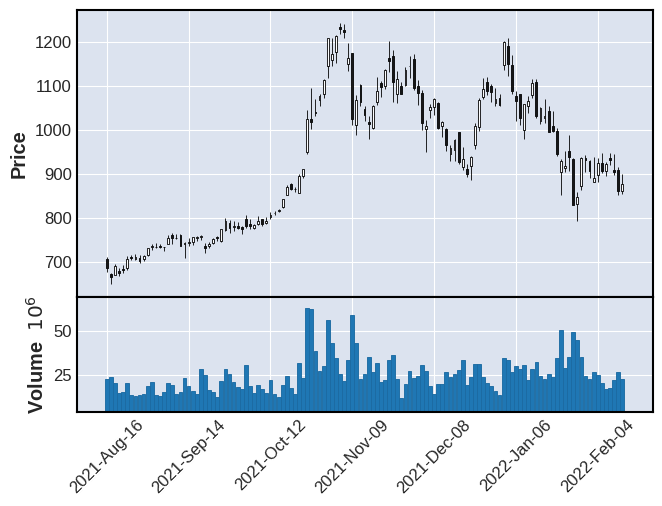

In [16]:
import mplfinance as mpf

bars = await Bars.get("TSLA", period="6mo", interval="1d")

mpf.plot(bars.df, type="candle", volume=True)

### or plot just a subset of the historical data

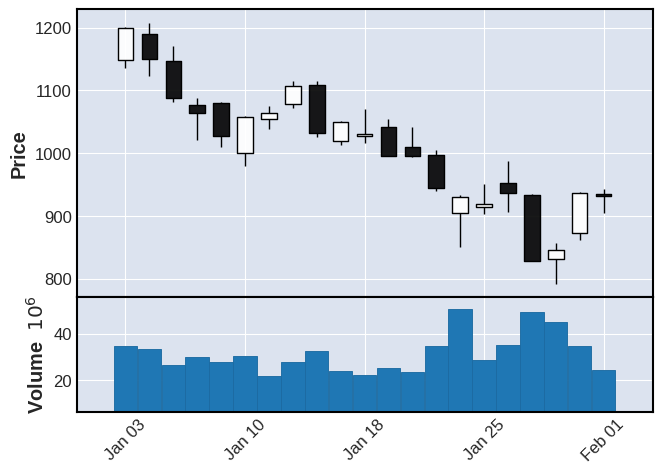

In [17]:
mpf.plot(bars.df.loc["2022-01-01":"2022-02-01"], type="candle", volume=True)

### Just like for `Assets` we can get historical prices for multiple symbols at the same time

The resulting object is a mapping between a symbol (str) and an instance of a `Bars` object.

A `BarsMulti` object can also be viewed as a single dataframe, with multi level columns

In [20]:
from pstock import BarsMulti

all_bars = await BarsMulti.get(["AAPL", "TSLA", "ARKK"], period="5d", interval="1d")
all_bars.df

AAPL                                                  \
                  open        high         low       close   adj_close   
date                                                                     
2022-02-08  171.729996  175.350006  171.429993  174.830002  174.830002   
2022-02-09  176.050003  176.649994  174.899994  176.279999  176.279999   
2022-02-10  174.139999  175.479996  171.550003  172.119995  172.119995   
2022-02-11  172.330002  173.080002  168.039993  168.639999  168.639999   
2022-02-14  167.369995  169.571396  166.559998  168.880005  168.880005   

                                       TSLA                          ...  \
                volume interval        open        high         low  ...   
date                                                                 ...   
2022-02-08  74829200.0   1 days  905.530029  926.289978  894.799988  ...   
2022-02-09  71285000.0   1 days  935.000000  946.270020  920.000000  ...   
2022-02-10  90865900.0   1 days  908.369995  943.809998  896.700012  ...   
2022-02-11  98566000.0   1 days  909.630005  915.960022  850.700012  ...   
2022-02-14  81601195.0   1 days  861.570007  898.879883  853.150024  ...   

                                                  ARKK                        \
             adj_close      volume interval       open       high        low   
date                                                                           
2022-02-08  922.000000  16909700.0   1 days  72.029999  72.779999  70.459999   
2022-02-09  932.000000  17419800.0   1 days  73.629997  76.480003  73.519997   
2022-02-10  904.549988  22042300.0   1 days  74.309998  78.250000  73.099998   
2022-02-11  860.000000  26492700.0   1 days  74.250000  76.239998  70.919998   
2022-02-14  875.760010  22267816.0   1 days  71.540001  74.129997  70.559998   

                                                       
                close  adj_close      volume interval  
date                                                   
2022-02-08  72.389999  72.389999  17707200.0   1 days  
2022-02-09  76.110001  76.110001  22089100.0   1 days  
2022-02-10  73.760002  73.760002  32600400.0   1 days  
2022-02-11  71.900002  71.900002  30115400.0   1 days  
2022-02-14  71.389999  71.389999  22544743.0   1 days  

[5 rows x 21 columns]

In [24]:
len(all_bars)

3

In [23]:
list(all_bars)

['AAPL', 'TSLA', 'ARKK']

In [21]:
all_bars.df["AAPL"]

,open,high,low,close,adj_close,volume,interval
date,,,,,,,
2022-02-08,171.729996,175.350006,171.429993,174.830002,174.830002,74829200.0,1 days
2022-02-09,176.050003,176.649994,174.899994,176.279999,176.279999,71285000.0,1 days
2022-02-10,174.139999,175.479996,171.550003,172.119995,172.119995,90865900.0,1 days
2022-02-11,172.330002,173.080002,168.039993,168.639999,168.639999,98566000.0,1 days
2022-02-14,167.369995,169.571396,166.559998,168.880005,168.880005,81601195.0,1 days


In [22]:
all_bars["AAPL"].df

,open,high,low,close,adj_close,volume,interval
date,,,,,,,
2022-02-08,171.729996,175.350006,171.429993,174.830002,174.830002,74829200.0,1 days
2022-02-09,176.050003,176.649994,174.899994,176.279999,176.279999,71285000.0,1 days
2022-02-10,174.139999,175.479996,171.550003,172.119995,172.119995,90865900.0,1 days
2022-02-11,172.330002,173.080002,168.039993,168.639999,168.639999,98566000.0,1 days
2022-02-14,167.369995,169.571396,166.559998,168.880005,168.880005,81601195.0,1 days


## News

In [25]:
from pstock import News

news = await News.get("TSLA")
news.df

,title,url,summary
date,,,
2022-02-14 10:37:36+00:00,Nio stock falls after downbeat China auto sale...,https://finance.yahoo.com/m/2a305b26-116d-3bab...,Share of China-based electric vehicle maker Ni...
2022-02-14 10:38:11+00:00,Inflation May Raise Corporate America's Profit...,https://finance.yahoo.com/news/inflation-may-r...,We have narrowed our search to five U.S. corpo...
2022-02-14 11:54:00+00:00,Tesla Stock Higher After Data Shows Slowing Ja...,https://finance.yahoo.com/m/3f962520-2999-3e6b...,Tesla saw a slowdown in China sales last month...
2022-02-14 12:16:14+00:00,Dow Jones Futures Erase Losses On Russia Comme...,https://finance.yahoo.com/m/a92a3092-72f4-3154...,Futures rose with Russia/Ukraine tensions in f...
2022-02-14 12:36:38+00:00,Elon Musk blames ‘fun police’ for recall of ov...,https://www.independent.co.uk/life-style/gadge...,This is Tesla’s fourth recall in two months
2022-02-14 12:52:00+00:00,"Got $3,000? 4 Tech Stocks to Buy and Hold for ...",https://finance.yahoo.com/m/1de35379-ab05-3b05...,Investors might end up with a severe case of w...
2022-02-14 13:01:00+00:00,Tesla Bulls and Bears Both Think Its Self-Driv...,https://finance.yahoo.com/m/57ac42b2-f4b8-379d...,"Tesla bulls and bears continue to, indirectly,..."
2022-02-14 13:07:17+00:00,Jim Simons’ Quant Hedge Fund Is Selling These ...,https://finance.yahoo.com/news/jim-simons-quan...,"In this article, we discuss 10 stocks that Jim..."
2022-02-14 13:10:02+00:00,American Axle (AXL) Q4 Earnings & Sales Lag Es...,https://finance.yahoo.com/news/american-axle-a...,The ongoing chip shortage hits American Axle's...
